In [1]:
import sys
sys.path.append('../pyorderedfuzzy')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ofnumber as ofn
import ofmodels as ofm
import ofrandom as ofr

In [3]:
p = 0.5
s2 = 1
mu = ofn.OFNumber.init_gaussian(5,-0.5, 5, 0.5)
sig2 = ofn.OFNumber.init_trapezoid_x0x1(0.002, 0.003, 0.005, 0.003)

In [4]:
ofs = ofm.OFSeries([mu, sig2]) 

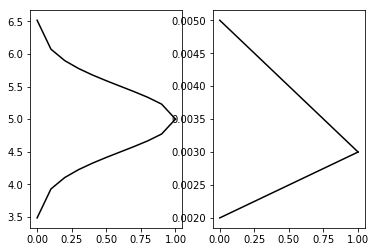

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
mu.plot_ofn(ax1)
sig2.plot_ofn(ax2)
plt.show()

In [16]:
sample10 = ofr.ofnormal_sample(1000, mu=mu, sig2=sig2, s2=s2, p=p)

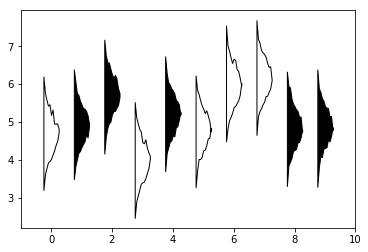

In [7]:
fig, ax = plt.subplots()
sample10.plot_ofseries(ax)
plt.show()

In [17]:
nmu = mu.change_order()
nsig2 = sig2.change_order()
expected = p*mu+(1-p)*nmu
var = p*(1-p)*(mu-nmu)*(mu-nmu)+p*(sig2)+(1-p)*nsig2+s2

In [18]:
sample_expected = sample10.mean_fuzzy()
sample_var = sample10.var_fuzzy()

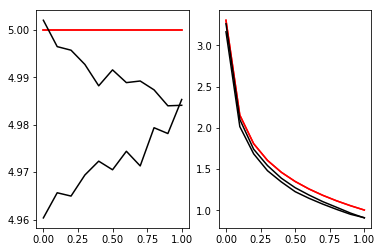

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2)
expected.plot_ofn(ax1, kwargs_f={'c': 'r'}, kwargs_g={'c': 'r'})
sample_expected.plot_ofn(ax1)
var.plot_ofn(ax2, kwargs_f={'c': 'r'}, kwargs_g={'c': 'r'})
sample_var.plot_ofn(ax2)
plt.show()

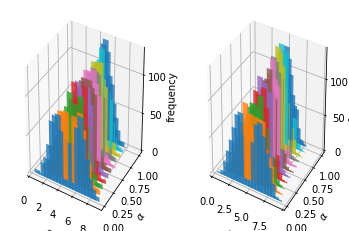

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axf = fig.add_subplot(121, projection='3d')
axg = fig.add_subplot(122, projection='3d')
sample10.plot_3d_histogram(axf, axg)
plt.show()

In [30]:
result = []
for n in [10, 100, 1000, 10000, 100000]:
    print(n)
    result.append([])
    temp_p = []
    temp_s2 = []
    for k in range(10):
        print(k, end=' ')
        sample = ofr.ofnormal_sample(n, mu=mu, sig2=sig2, s2=s2, p=p)
        temp_p.append(abs(p-ofr.ofnormal_p_est(sample)))
        temp_s2.append(abs(s2-ofr.ofnormal_s2_est(sample)))
    print()
    result[-1].append(np.mean(temp_p))
    result[-1].append(np.mean(temp_s2))  
result

10
0 1 2 3 4 5 6 7 8 9 
100
0 1 2 3 4 5 6 7 8 9 
1000
0 1 2 3 4 5 6 7 8 9 
10000
0 1 2 3 4 5 6 7 8 9 
100000
0 1 2 3 4 5 6 7 8 9 


[[0.12999999999999998, 0.33710040738117336],
 [0.028000000000000014, 0.10351460095064313],
 [0.008300000000000007, 0.045623796375010475],
 [0.003649999999999998, 0.008439281407143562],
 [0.0011079999999999922, 0.0025086560807356605]]

In [28]:
result

[[0.18463622161758453],
 [0.08327087040409395],
 [0.020978255440194382],
 [0.008630080959780632],
 [0.002986547994918168]]

In [20]:
ofs.var_crisp()

0.8124999999999997

In [21]:
ofs.var_fuzzy()

([9.33333333 7.63       6.25333333 5.20333333 4.48       4.08333333
 4.01333333 4.27       4.85333333 5.76333333 7.        ], [5.33333333 4.56333333 3.85333333 3.20333333 2.61333333 2.08333333
 1.61333333 1.20333333 0.85333333 0.56333333 0.33333333])

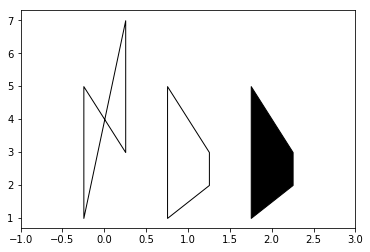

In [22]:
a = ofn.OFNumber.init_trapezoid_x0x1(1, 7, 5, 3)
b = ofn.OFNumber.init_trapezoid_x0x1(1, 2, 5, 3)
c = ofn.OFNumber.init_trapezoid_x0x1(5, 3, 1, 2)
ofs = ofm.OFSeries([a,b,c]) 
fig, ax = plt.subplots()
ofs.plot_ofseries(ax)
plt.show()

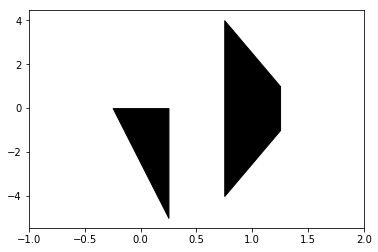

In [23]:
ofs_diff = ofs.transform()
fig, ax = plt.subplots()
ofs_diff.plot_ofseries(ax)
plt.show()

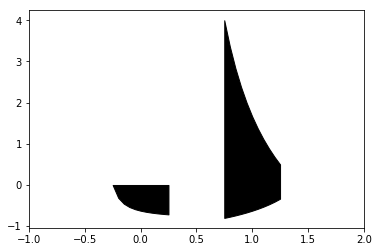

In [24]:
ofs_ret = ofs.transform(method='ret')
fig, ax = plt.subplots()
ofs_ret.plot_ofseries(ax)
plt.show()

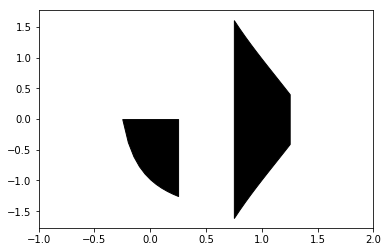

In [25]:
ofs_logret = ofs.transform(method='logret')
fig, ax = plt.subplots()
ofs_logret.plot_ofseries(ax)
plt.show()

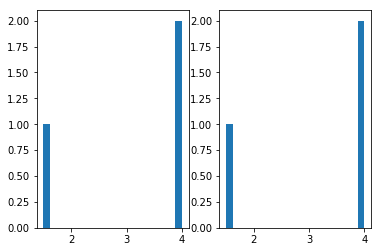

In [26]:
fig, (axf, axg) = plt.subplots(1, 2)
ofs.plot_histogram(axf, axg, 0.5)
plt.show()